# Scraping Wikipedia and creating wordclouds
__Goal__: Create a wordcloud to show off to others.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import urllib.request
from bs4 import BeautifulSoup

import nltk
import string
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
from PIL import Image

### 1. Find a piece of meaningful text

In [2]:
url = 'https://en.wikipedia.org/wiki/Cultural_Revolution'

#Open web page and parse HTML
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

#Find all paragraphs and subject
all_paragraphs = soup.find_all('p')
subject = soup.find('title').text.split('-')[0].strip()

#Loop through all paragraps and gather up text into a long string
wiki_string =''

for para in all_paragraphs:
    if para.string == None:
        for p in para:
            if p.string != None:
                wiki_string = wiki_string + p.string
    else:
        wiki_string = wiki_string + para.string

### 2. Vectorize the text, and plot the frequency distribution

In [3]:
stopwords = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation
result = []
lemmatizer = WordNetLemmatizer()

cult_word=[]
for sent in nltk.sent_tokenize(wiki_string):
    for word in nltk.wordpunct_tokenize(sent):
        word = word.lower()
        word = lemmatizer.lemmatize(word)
        if word not in stopwords and word not in punctuation:
            cult_word.append(word)

In [4]:
filter_words = {'11', '184', '87', '252', '47', '198', '221', '36', '228', '88', '50', '179', '200', '112', '259', '48', '99', '68', '132', '126', '166', '37', '234', '120', '245', '103', '142', '191', '81', '207', '133', '33', '719', '242', '192', '40', '15', '185', '264', '206', '136', '21', '100', '222', '260', '42', '108', '500', '828', '93', '134', '158', '235', '74', '30', '19', '102', '114', '213', '90', '181', '24', '17', '10', '57', '177', '94', '202', '258', '275', '55', '104', '223', '20', '60', '8341', '",', '147', '125', '44', '254', '16', '135', '32', '86', '272', '34', '268', '96', '124', '922', '772', '129', '277', '122', '201', '226', '220', '900', '14', '196', '231', '180', '214', '27', '227', '237', '265', '171', '170', '182', '52', '92', '178', '18', '253', '13', '208', '267', '119', '197', '61', '790', '203', '240', '190', '251', '23', '186', '271', '73', '800', '123', '246', '98', '238', '41', '217', '218', '266', '216', '278', '110', '187', '225', '84', '76', '257', '704', '80', '64', '31', '117', '269', '121', '49', '113', '51', '85', '212', '25', '310', '71', '78', '149', '58', '91', '38', '262', '270', '83', '115', '209', '101', '111', '22', '79', '195', '29', '39', '571', '189', '70', '243', '219', '89', '169', '45', '211', '261', '545', '000', '168', '".', '138', '511', '300', '534', '210', '230', '239', '236', '43', '183', '118', '232', '62', '729', '59', '35', '67', '233', '107', '128', '255', '53', '127', '116', '274', '82', '843', '244', '109', '56', '77', '877', '194', '105', '199', '273', '224', '167', '241', '193', '276', '72', '165', '250', '130', '205', '106', '263', '229', '54', '65', '256', '69', 'wa', '26', '95', '97', '600', '12', '188', '28', '148', '215', '75', '131', '66', '204'}
cult_word2 = [word for word in cult_word if word not in filter_words]

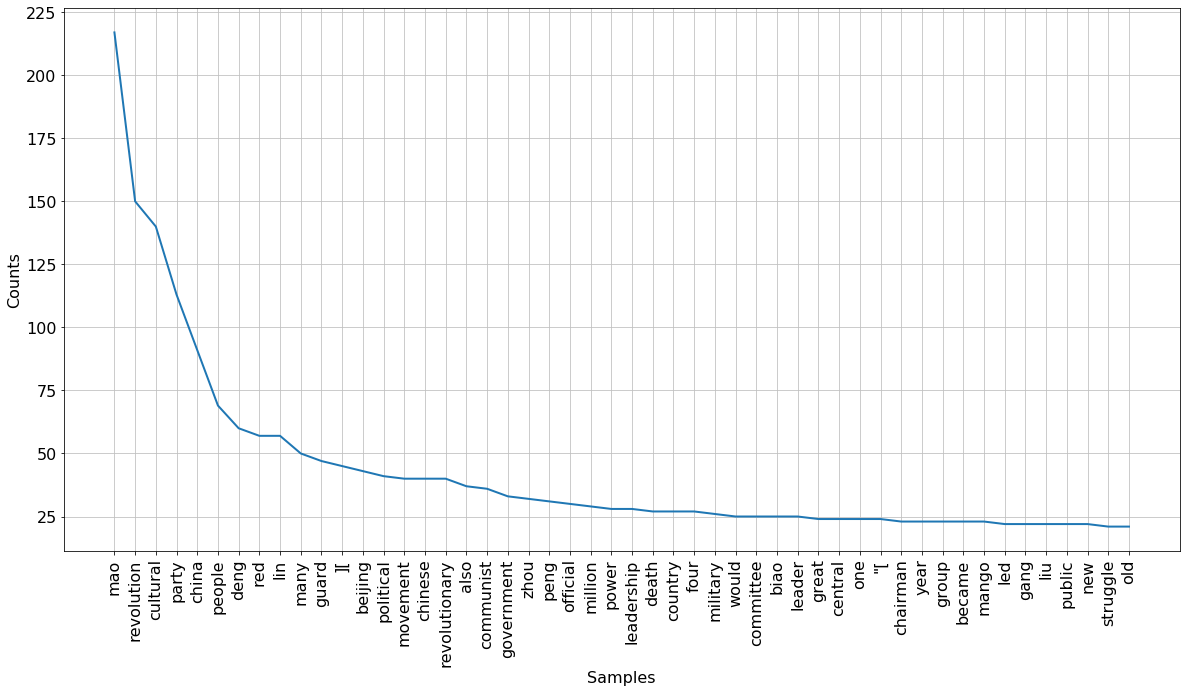

In [5]:
cult_text = nltk.text.Text(cult_word2)

plt.figure(figsize=(20, 10))
plt.rc('font', size=16)
cult_text.plot(50)

In [6]:
cult_text2 = " ".join(cult_word2)

vectorizer = TfidfVectorizer(stop_words='english')
dt_matrix = vectorizer.fit_transform([cult_text2])

weights = dt_matrix.toarray()

In [7]:
features = vectorizer.get_feature_names()

In [8]:
weights = dt_matrix.toarray()

In [9]:
tfidf_dist = dict(zip(features, weights[0]))

### 3. Generate wordcloud from text

(-0.5, 999.5, 287.5, -0.5)

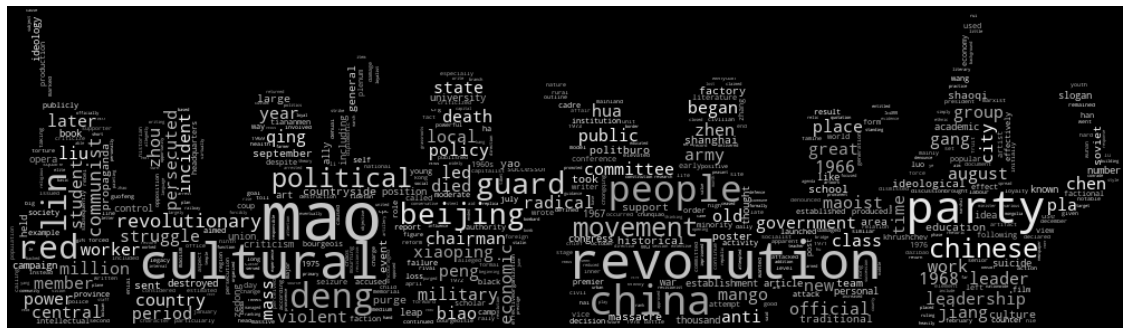

In [10]:
# Create mask from image
rev_mask = np.array(Image.open("figures/rev.jpg"))
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(5, 0%%, %d%%)" % np.random.randint(60, 100)

wc = WordCloud(background_color="black", max_words=1000, mask=rev_mask,
               stopwords=stopwords, contour_width=0.1, colormap=None)

wc.generate_from_frequencies(tfidf_dist)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(wc, interpolation='bilinear')

# store default colored image
default_colors = wc.to_array()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")

wc.to_file("figures/cultrev_wc.png")
plt.axis("off")